# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 2168 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 2168) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 2168) |                       | Elapsed Time: 0:00:26 ETA: 1:47:12

  1% (  28 of 2168) |                       | Elapsed Time: 0:00:27 ETA: 0:37:04

  2% (  44 of 2168) |                       | Elapsed Time: 0:00:27 ETA: 0:21:55

  2% (  63 of 2168) |                       | Elapsed Time: 0:00:27 ETA: 0:15:19

  3% (  82 of 2168) |                       | Elapsed Time: 0:00:27 ETA: 0:00:28

  4% (  97 of 2168) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:28

  5% ( 116 of 2168) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:29

  5% ( 130 of 2168) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:29

  6% ( 143 of 2168) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:30

  7% ( 157 of 2168) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:30

  7% ( 171 of 2168) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:30

  8% ( 190 of 2168) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:30

  9% ( 206 of 2168) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:29

 10% ( 225 of 2168) |##                     | Elapsed Time: 0:00:29 ETA: 0:00:27

 11% ( 244 of 2168) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:26

 11% ( 259 of 2168) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:25

 12% ( 280 of 2168) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:24

 13% ( 299 of 2168) |###                    | Elapsed Time: 0:00:30 ETA: 0:00:24

 14% ( 314 of 2168) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:24

 15% ( 334 of 2168) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:24

 16% ( 353 of 2168) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:24

 16% ( 368 of 2168) |###                    | Elapsed Time: 0:00:31 ETA: 0:00:24

 17% ( 388 of 2168) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:24

 18% ( 407 of 2168) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:24

 19% ( 420 of 2168) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:25

 20% ( 442 of 2168) |####                   | Elapsed Time: 0:00:32 ETA: 0:00:25

 21% ( 461 of 2168) |####                   | Elapsed Time: 0:00:33 ETA: 0:00:25

 21% ( 476 of 2168) |#####                  | Elapsed Time: 0:00:33 ETA: 0:00:24

 22% ( 495 of 2168) |#####                  | Elapsed Time: 0:00:33 ETA: 0:00:24

 23% ( 515 of 2168) |#####                  | Elapsed Time: 0:00:33 ETA: 0:00:23

 24% ( 529 of 2168) |#####                  | Elapsed Time: 0:00:34 ETA: 0:00:23

 25% ( 543 of 2168) |#####                  | Elapsed Time: 0:00:34 ETA: 0:00:23

 25% ( 556 of 2168) |#####                  | Elapsed Time: 0:00:34 ETA: 0:00:23

 26% ( 577 of 2168) |######                 | Elapsed Time: 0:00:34 ETA: 0:00:23

 27% ( 597 of 2168) |######                 | Elapsed Time: 0:00:35 ETA: 0:00:23

 28% ( 612 of 2168) |######                 | Elapsed Time: 0:00:35 ETA: 0:00:22

 29% ( 631 of 2168) |######                 | Elapsed Time: 0:00:35 ETA: 0:00:22

 30% ( 651 of 2168) |######                 | Elapsed Time: 0:00:35 ETA: 0:00:21

 30% ( 666 of 2168) |#######                | Elapsed Time: 0:00:36 ETA: 0:00:21

 31% ( 686 of 2168) |#######                | Elapsed Time: 0:00:36 ETA: 0:00:20

 32% ( 705 of 2168) |#######                | Elapsed Time: 0:00:36 ETA: 0:00:20

 33% ( 718 of 2168) |#######                | Elapsed Time: 0:00:36 ETA: 0:00:20

 33% ( 732 of 2168) |#######                | Elapsed Time: 0:00:37 ETA: 0:00:21

 34% ( 748 of 2168) |#######                | Elapsed Time: 0:00:37 ETA: 0:00:20

 35% ( 767 of 2168) |########               | Elapsed Time: 0:00:37 ETA: 0:00:19

 36% ( 786 of 2168) |########               | Elapsed Time: 0:00:37 ETA: 0:00:19

 36% ( 801 of 2168) |########               | Elapsed Time: 0:00:38 ETA: 0:00:18

 37% ( 814 of 2168) |########               | Elapsed Time: 0:00:38 ETA: 0:00:18

 38% ( 829 of 2168) |########               | Elapsed Time: 0:00:38 ETA: 0:00:18

 39% ( 849 of 2168) |#########              | Elapsed Time: 0:00:38 ETA: 0:00:19

 40% ( 868 of 2168) |#########              | Elapsed Time: 0:00:39 ETA: 0:00:18

 40% ( 882 of 2168) |#########              | Elapsed Time: 0:00:39 ETA: 0:00:18

 41% ( 895 of 2168) |#########              | Elapsed Time: 0:00:39 ETA: 0:00:18

 41% ( 910 of 2168) |#########              | Elapsed Time: 0:00:39 ETA: 0:00:18

 42% ( 930 of 2168) |#########              | Elapsed Time: 0:00:39 ETA: 0:00:18

 43% ( 949 of 2168) |##########             | Elapsed Time: 0:00:40 ETA: 0:00:18

 44% ( 964 of 2168) |##########             | Elapsed Time: 0:00:40 ETA: 0:00:17

 45% ( 983 of 2168) |##########             | Elapsed Time: 0:00:40 ETA: 0:00:17

 46% (1003 of 2168) |##########             | Elapsed Time: 0:00:41 ETA: 0:00:16

 46% (1018 of 2168) |##########             | Elapsed Time: 0:00:41 ETA: 0:00:16

 47% (1037 of 2168) |###########            | Elapsed Time: 0:00:41 ETA: 0:00:16

 48% (1057 of 2168) |###########            | Elapsed Time: 0:00:41 ETA: 0:00:16

 49% (1072 of 2168) |###########            | Elapsed Time: 0:00:42 ETA: 0:00:15

 50% (1092 of 2168) |###########            | Elapsed Time: 0:00:42 ETA: 0:00:15

 51% (1112 of 2168) |###########            | Elapsed Time: 0:00:42 ETA: 0:00:15

 51% (1127 of 2168) |###########            | Elapsed Time: 0:00:42 ETA: 0:00:15

 52% (1147 of 2168) |############           | Elapsed Time: 0:00:43 ETA: 0:00:14

 53% (1166 of 2168) |############           | Elapsed Time: 0:00:43 ETA: 0:00:14

 54% (1181 of 2168) |############           | Elapsed Time: 0:00:43 ETA: 0:00:13

 55% (1200 of 2168) |############           | Elapsed Time: 0:00:43 ETA: 0:00:13

 56% (1220 of 2168) |############           | Elapsed Time: 0:00:44 ETA: 0:00:13

 56% (1234 of 2168) |#############          | Elapsed Time: 0:00:44 ETA: 0:00:13

 57% (1247 of 2168) |#############          | Elapsed Time: 0:00:44 ETA: 0:00:13

 58% (1262 of 2168) |#############          | Elapsed Time: 0:00:44 ETA: 0:00:13

 59% (1282 of 2168) |#############          | Elapsed Time: 0:00:45 ETA: 0:00:13

 60% (1301 of 2168) |#############          | Elapsed Time: 0:00:45 ETA: 0:00:12

 60% (1315 of 2168) |#############          | Elapsed Time: 0:00:45 ETA: 0:00:12

 61% (1335 of 2168) |##############         | Elapsed Time: 0:00:45 ETA: 0:00:11

 62% (1356 of 2168) |##############         | Elapsed Time: 0:00:46 ETA: 0:00:11

 63% (1370 of 2168) |##############         | Elapsed Time: 0:00:46 ETA: 0:00:11

 63% (1383 of 2168) |##############         | Elapsed Time: 0:00:46 ETA: 0:00:11

 64% (1398 of 2168) |##############         | Elapsed Time: 0:00:46 ETA: 0:00:11

 65% (1417 of 2168) |###############        | Elapsed Time: 0:00:47 ETA: 0:00:10

 66% (1437 of 2168) |###############        | Elapsed Time: 0:00:47 ETA: 0:00:10

 66% (1452 of 2168) |###############        | Elapsed Time: 0:00:47 ETA: 0:00:10

 67% (1472 of 2168) |###############        | Elapsed Time: 0:00:47 ETA: 0:00:09

 68% (1491 of 2168) |###############        | Elapsed Time: 0:00:48 ETA: 0:00:09

 69% (1505 of 2168) |###############        | Elapsed Time: 0:00:48 ETA: 0:00:09

 70% (1518 of 2168) |################       | Elapsed Time: 0:00:48 ETA: 0:00:09

 70% (1533 of 2168) |################       | Elapsed Time: 0:00:48 ETA: 0:00:09

 71% (1552 of 2168) |################       | Elapsed Time: 0:00:49 ETA: 0:00:09

 72% (1572 of 2168) |################       | Elapsed Time: 0:00:49 ETA: 0:00:08

 73% (1586 of 2168) |################       | Elapsed Time: 0:00:49 ETA: 0:00:08

 73% (1594 of 2168) |################       | Elapsed Time: 0:00:49 ETA: 0:00:08

 74% (1606 of 2168) |#################      | Elapsed Time: 0:00:50 ETA: 0:00:14

 74% (1621 of 2168) |#################      | Elapsed Time: 0:00:50 ETA: 0:00:14

 75% (1635 of 2168) |#################      | Elapsed Time: 0:00:51 ETA: 0:00:13

 76% (1654 of 2168) |#################      | Elapsed Time: 0:00:51 ETA: 0:00:13

 76% (1668 of 2168) |#################      | Elapsed Time: 0:00:51 ETA: 0:00:13

 77% (1688 of 2168) |#################      | Elapsed Time: 0:00:51 ETA: 0:00:07

 78% (1702 of 2168) |##################     | Elapsed Time: 0:00:52 ETA: 0:00:06

 79% (1715 of 2168) |##################     | Elapsed Time: 0:00:52 ETA: 0:00:06

 80% (1735 of 2168) |##################     | Elapsed Time: 0:00:52 ETA: 0:00:06

 80% (1750 of 2168) |##################     | Elapsed Time: 0:00:52 ETA: 0:00:06

 81% (1762 of 2168) |##################     | Elapsed Time: 0:00:53 ETA: 0:00:06

 81% (1776 of 2168) |##################     | Elapsed Time: 0:00:53 ETA: 0:00:06

 82% (1789 of 2168) |##################     | Elapsed Time: 0:00:53 ETA: 0:00:05

 83% (1803 of 2168) |###################    | Elapsed Time: 0:00:53 ETA: 0:00:05

 84% (1823 of 2168) |###################    | Elapsed Time: 0:00:54 ETA: 0:00:05

 85% (1843 of 2168) |###################    | Elapsed Time: 0:00:54 ETA: 0:00:04

 85% (1857 of 2168) |###################    | Elapsed Time: 0:00:54 ETA: 0:00:04

 86% (1877 of 2168) |###################    | Elapsed Time: 0:00:54 ETA: 0:00:04

 87% (1892 of 2168) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:04

 87% (1906 of 2168) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:03

 88% (1925 of 2168) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:03

 89% (1939 of 2168) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:03

 90% (1952 of 2168) |####################   | Elapsed Time: 0:00:55 ETA: 0:00:03

 90% (1966 of 2168) |####################   | Elapsed Time: 0:00:56 ETA: 0:00:02

 91% (1986 of 2168) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:02

 92% (2006 of 2168) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:02

 93% (2020 of 2168) |#####################  | Elapsed Time: 0:00:56 ETA: 0:00:02

 93% (2033 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:02

 94% (2047 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:01

 95% (2067 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:01

 96% (2087 of 2168) |###################### | Elapsed Time: 0:00:57 ETA: 0:00:01

 96% (2101 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:01

 97% (2121 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

 98% (2135 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

 99% (2149 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

100% (2168 of 2168) |######################| Elapsed Time: 0:00:59 Time: 0:00:59


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *   |
H_00 | *** | **  | *** | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *   | *   |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | *** | *** |


H_00 | *** | ns. | ns. | *** |


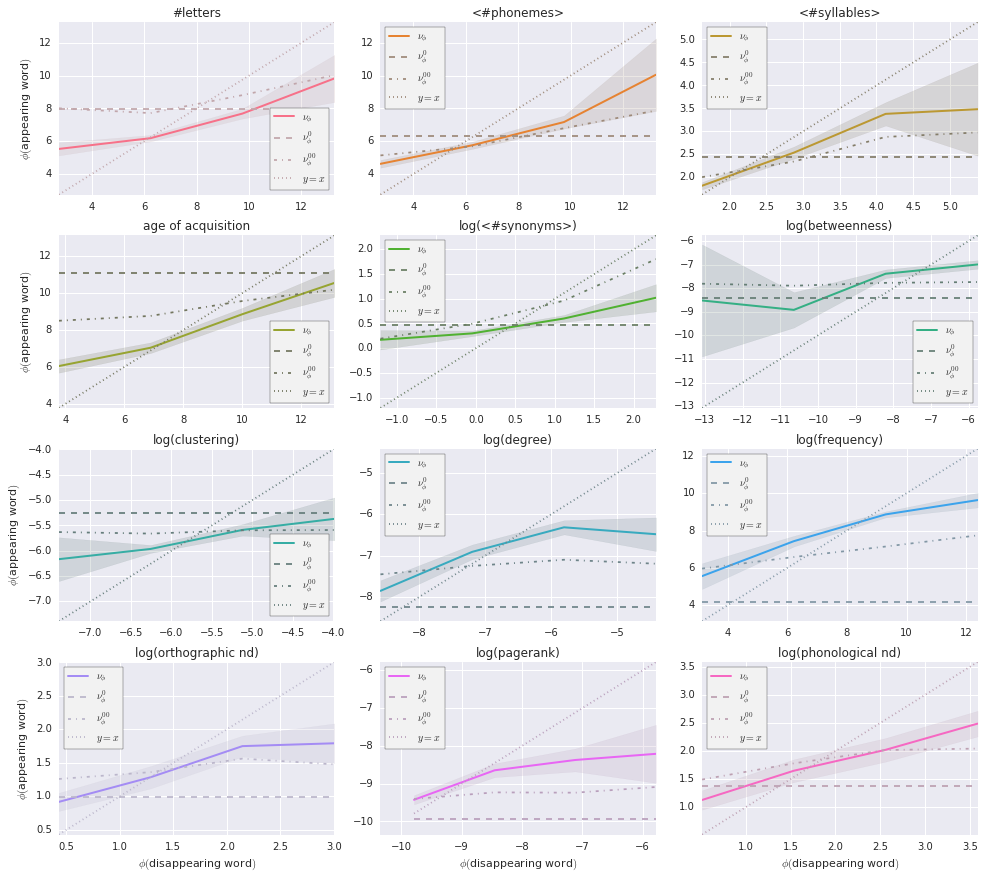

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

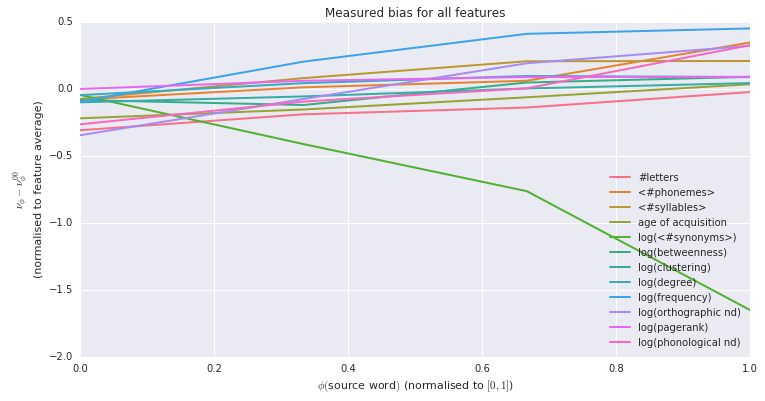

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *   | *   |


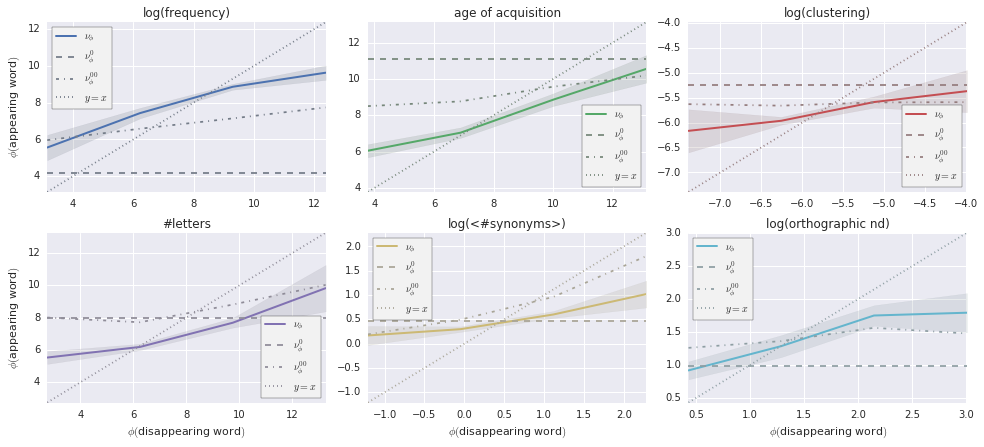

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

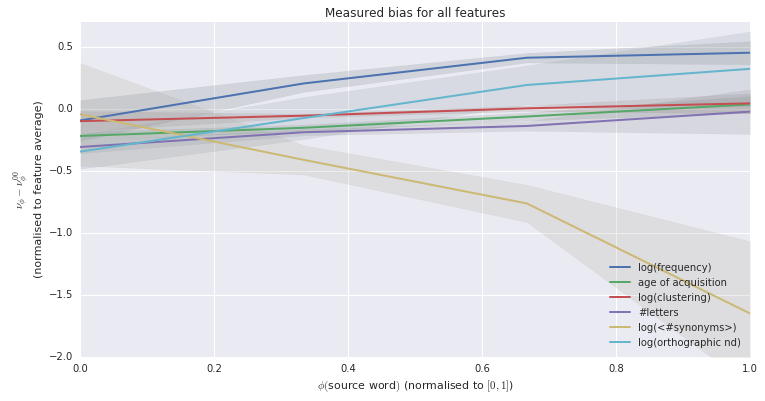

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | *** | **  | *   | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *   | *** |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |


H_00 | *** | **  | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | ns. | *** | *** |
H_00 | *** | *   | ns. | *** |


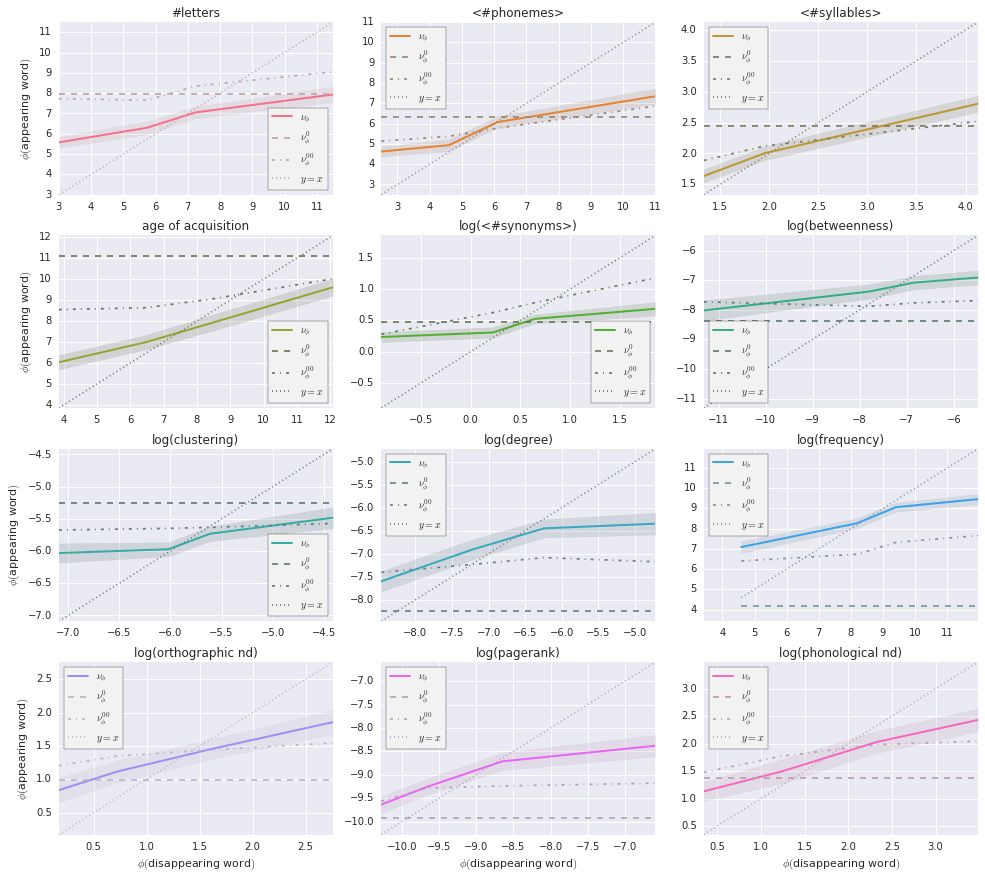

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

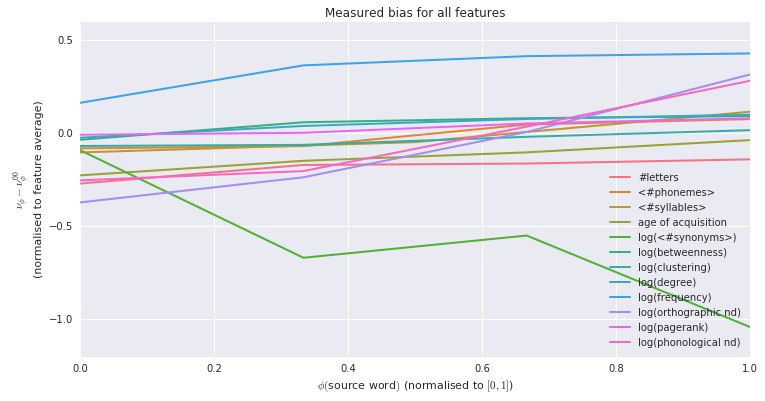

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | *** | **  | ns. | *** |


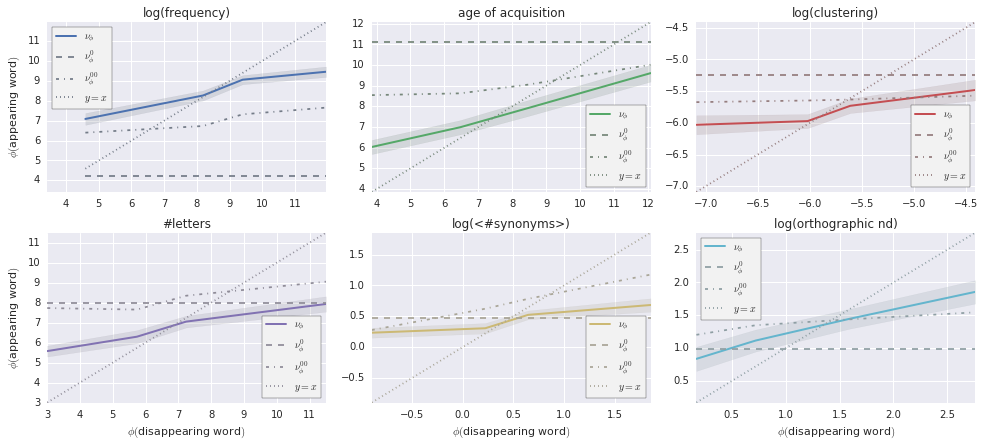

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

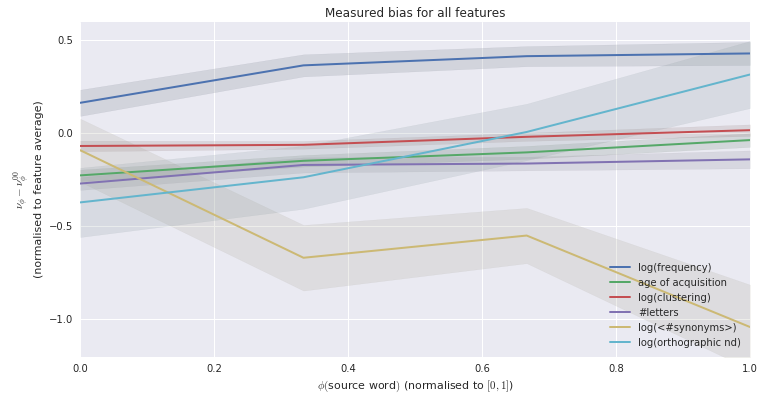

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | *   | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *   |
H_00 | ns. | **  | **  | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |


H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *   | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | ns. |
H_00 | ns. | *** | ns. | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |


H_00 | *** | *** | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *   |


H_00 | *** | *   | ns. | ns. |


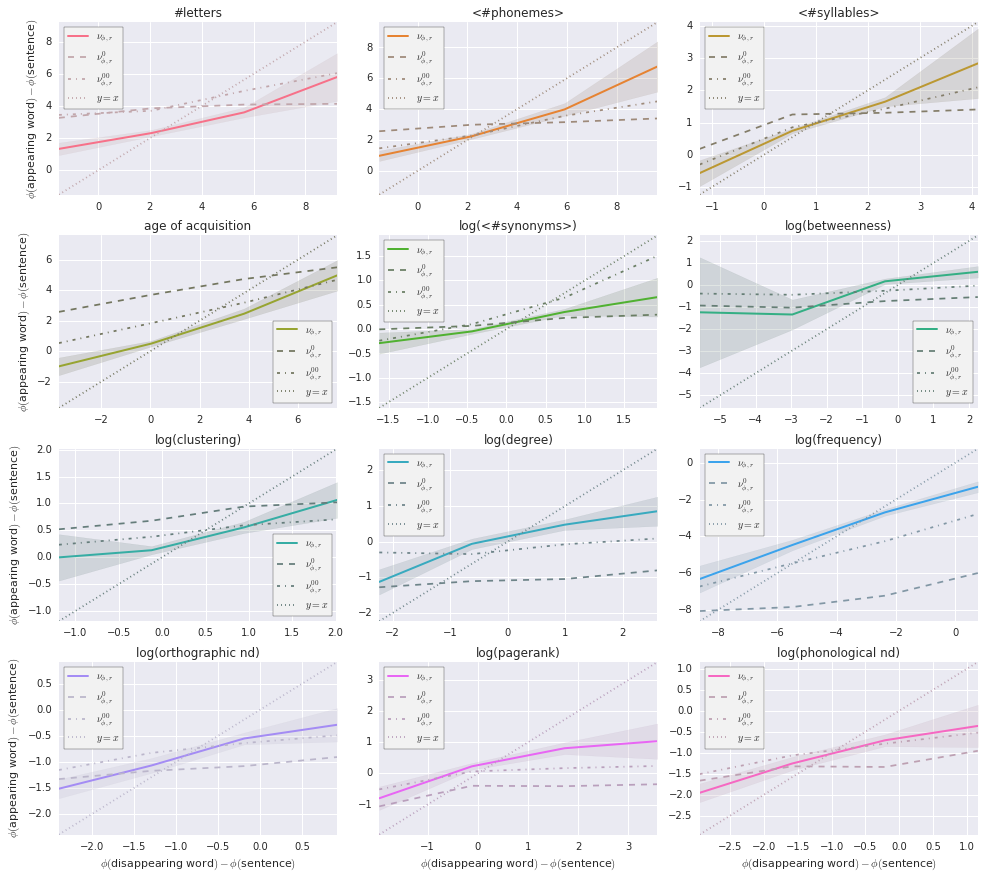

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

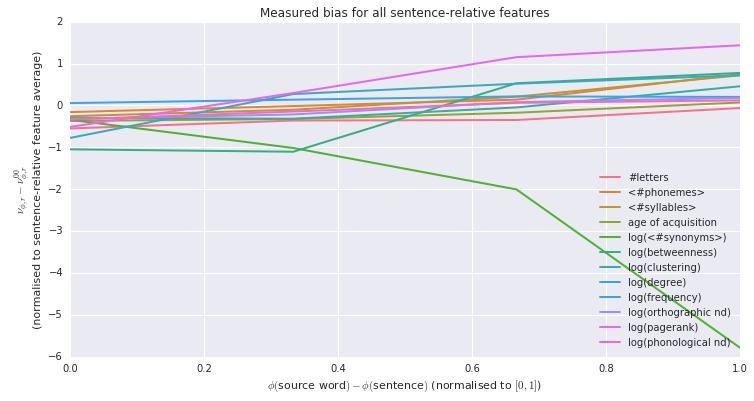

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |
H_00 | ns. | *** | ns. | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | *** | ns. | ns. |


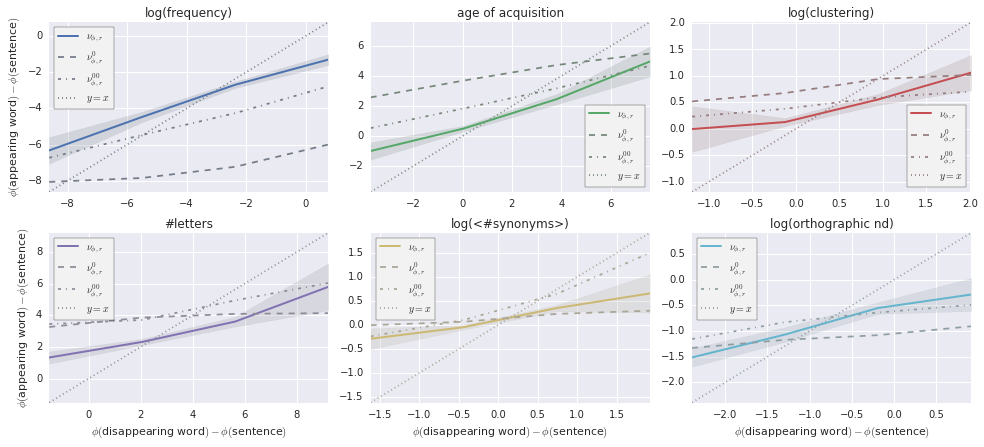

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

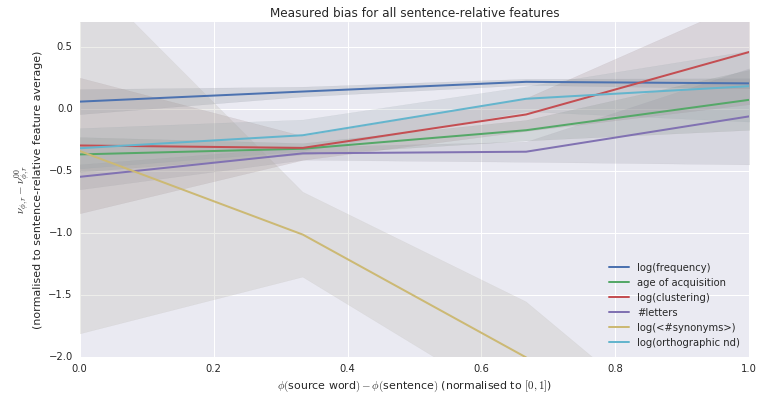

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | *** |
H_00 | **  | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | ns. | ns. | *** |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |


H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | *** | *** |
H_00 | *** | *   | ns. | **  |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |


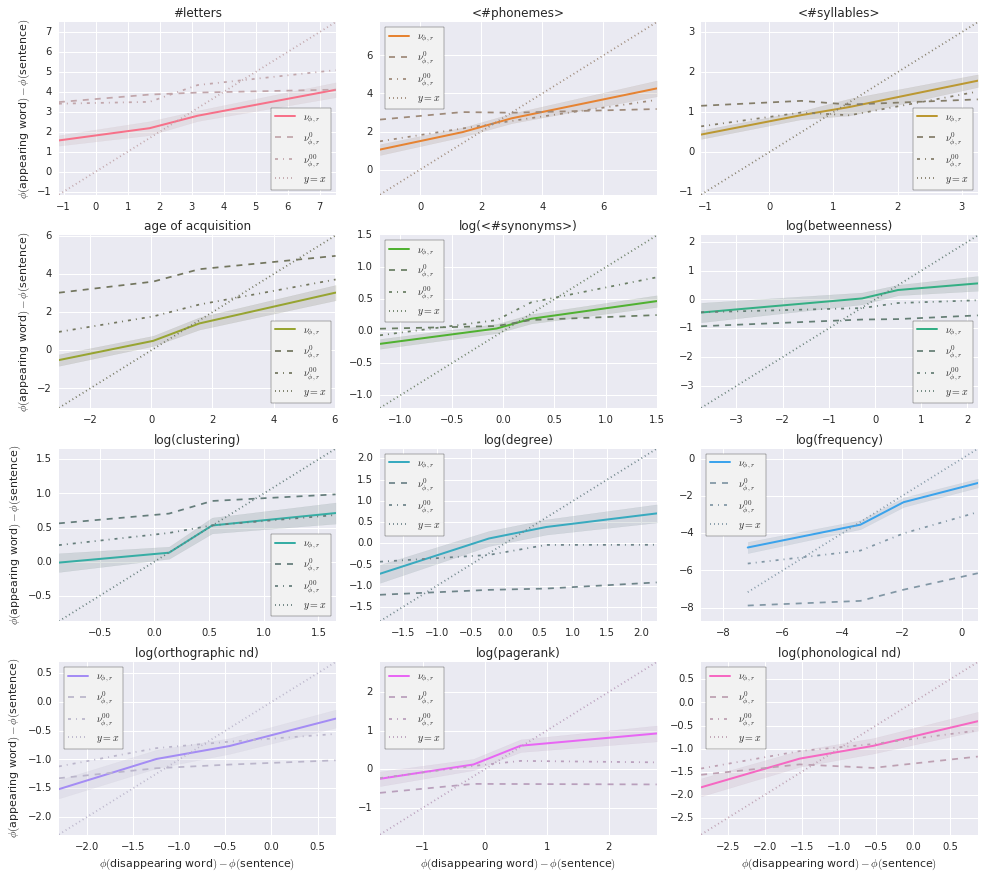

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

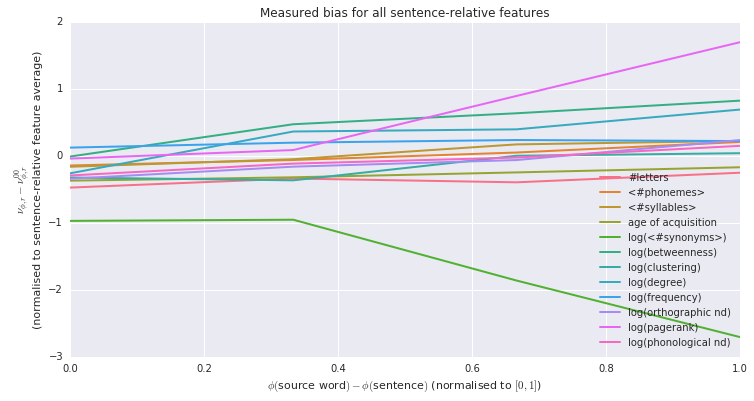

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *   | *** | *** |
H_00 | *** | *   | ns. | **  |


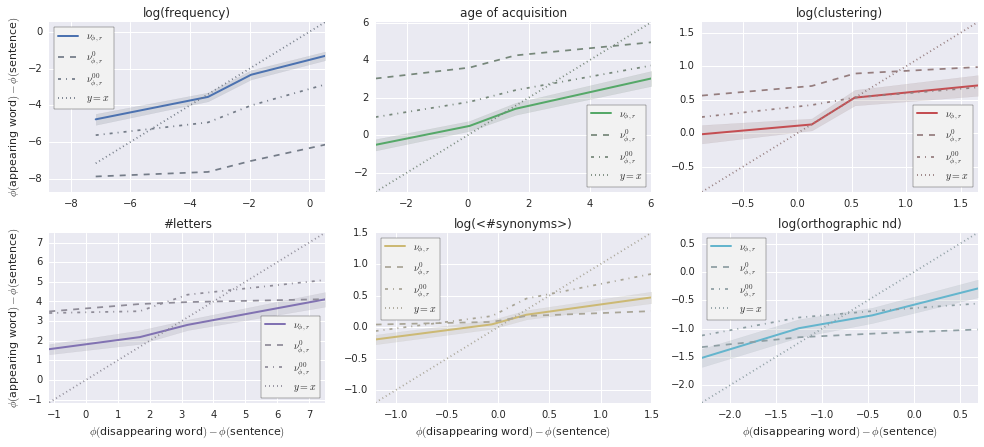

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

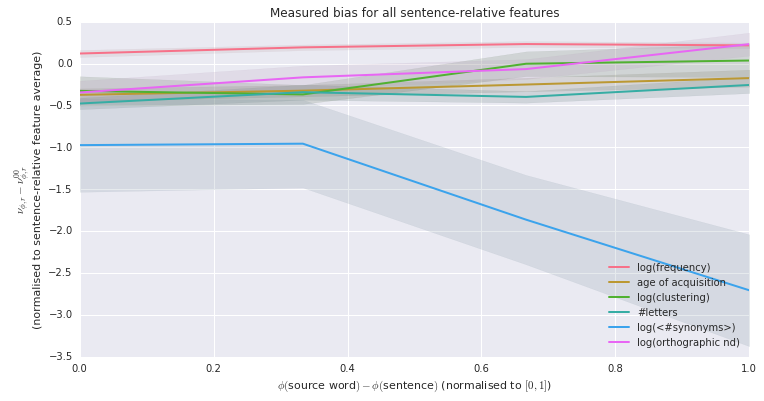

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


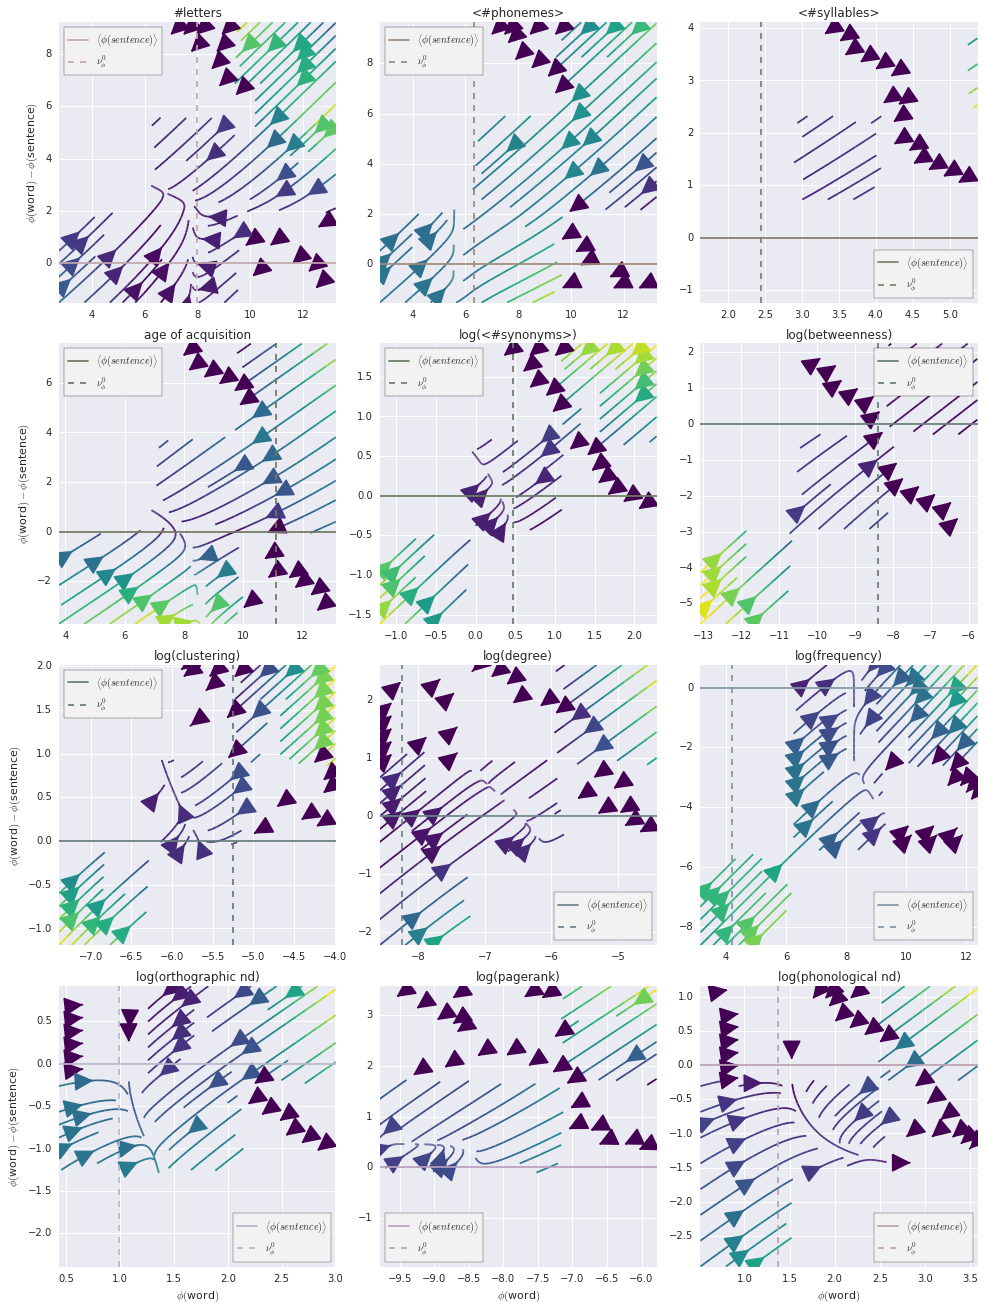

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


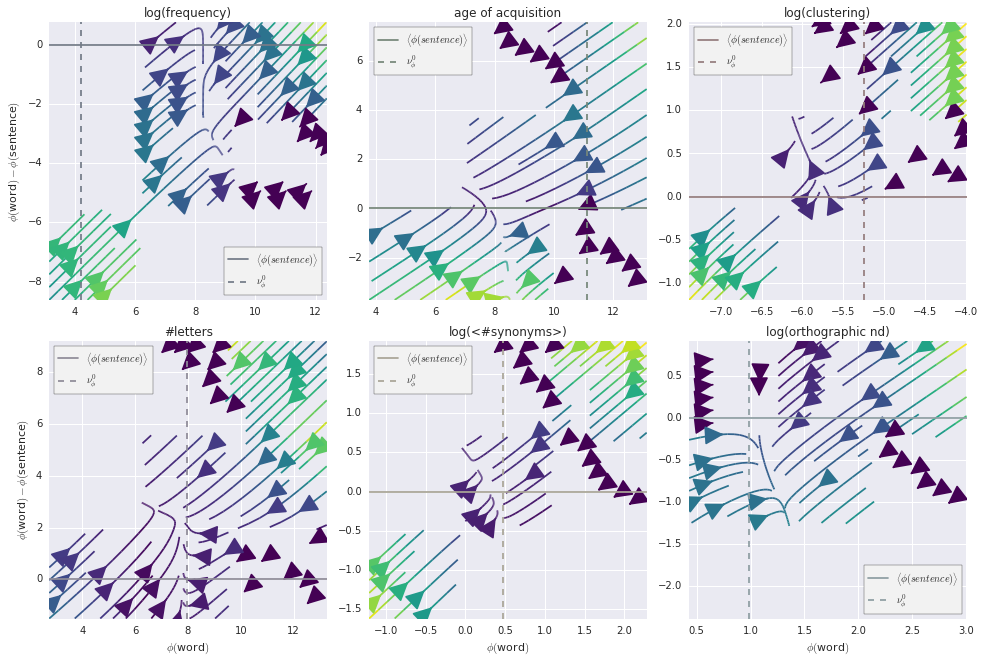

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.51105539  0.176333    0.08603859  0.07817559  0.03734429  0.02868622
  0.02356144  0.02031939  0.01675882  0.01116853]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.510785,-0.286850,0.091126,-0.238796,-0.237656,0.410184,-0.227300,-0.275261,0.374168,-0.281107,0.142458,0.002576
Component-1,0.287258,-0.398103,0.145273,-0.297842,-0.230560,-0.432424,0.165063,-0.288286,-0.461695,0.251920,-0.147527,0.016993
Component-2,0.612450,0.639580,-0.069962,0.181683,-0.330446,-0.109939,-0.000906,0.172796,-0.089919,0.094101,-0.037564,-0.091906


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2168) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  18 of 2168) |                       | Elapsed Time: 0:00:40 ETA: 1:21:09

  1% (  42 of 2168) |                       | Elapsed Time: 0:00:40 ETA: 0:34:33

  3% (  66 of 2168) |                       | Elapsed Time: 0:00:41 ETA: 0:21:51

  4% (  95 of 2168) |#                      | Elapsed Time: 0:00:41 ETA: 0:15:03

  5% ( 120 of 2168) |#                      | Elapsed Time: 0:00:41 ETA: 0:00:18

  6% ( 145 of 2168) |#                      | Elapsed Time: 0:00:41 ETA: 0:00:17

  7% ( 163 of 2168) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:19

  8% ( 190 of 2168) |##                     | Elapsed Time: 0:00:42 ETA: 0:00:18

 10% ( 217 of 2168) |##                     | Elapsed Time: 0:00:42 ETA: 0:00:18

 11% ( 244 of 2168) |##                     | Elapsed Time: 0:00:42 ETA: 0:00:18

 12% ( 272 of 2168) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:16

 14% ( 315 of 2168) |###                    | Elapsed Time: 0:00:43 ETA: 0:00:15

 15% ( 340 of 2168) |###                    | Elapsed Time: 0:00:43 ETA: 0:00:14

 16% ( 365 of 2168) |###                    | Elapsed Time: 0:00:43 ETA: 0:00:14

 18% ( 393 of 2168) |####                   | Elapsed Time: 0:00:44 ETA: 0:00:15

 19% ( 419 of 2168) |####                   | Elapsed Time: 0:00:44 ETA: 0:00:14

 21% ( 461 of 2168) |####                   | Elapsed Time: 0:00:44 ETA: 0:00:13

 22% ( 479 of 2168) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:14

 23% ( 500 of 2168) |#####                  | Elapsed Time: 0:00:45 ETA: 0:00:15

 24% ( 528 of 2168) |#####                  | Elapsed Time: 0:00:45 ETA: 0:00:14

 25% ( 549 of 2168) |#####                  | Elapsed Time: 0:00:45 ETA: 0:00:16

 26% ( 578 of 2168) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:17

 28% ( 611 of 2168) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:14

 30% ( 651 of 2168) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:14

 31% ( 678 of 2168) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:13

 32% ( 705 of 2168) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:12

 33% ( 732 of 2168) |#######                | Elapsed Time: 0:00:46 ETA: 0:00:11

 35% ( 759 of 2168) |########               | Elapsed Time: 0:00:47 ETA: 0:00:11

 36% ( 786 of 2168) |########               | Elapsed Time: 0:00:47 ETA: 0:00:10

 37% ( 814 of 2168) |########               | Elapsed Time: 0:00:47 ETA: 0:00:11

 38% ( 841 of 2168) |########               | Elapsed Time: 0:00:47 ETA: 0:00:10

 40% ( 868 of 2168) |#########              | Elapsed Time: 0:00:48 ETA: 0:00:10

 41% ( 895 of 2168) |#########              | Elapsed Time: 0:00:48 ETA: 0:00:10

 42% ( 922 of 2168) |#########              | Elapsed Time: 0:00:48 ETA: 0:00:10

 43% ( 949 of 2168) |##########             | Elapsed Time: 0:00:48 ETA: 0:00:10

 45% ( 976 of 2168) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:10

 46% (1003 of 2168) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:09

 47% (1030 of 2168) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:09

 48% (1057 of 2168) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:09

 50% (1085 of 2168) |###########            | Elapsed Time: 0:00:49 ETA: 0:00:08

 51% (1112 of 2168) |###########            | Elapsed Time: 0:00:50 ETA: 0:00:08

 52% (1139 of 2168) |############           | Elapsed Time: 0:00:50 ETA: 0:00:08

 53% (1166 of 2168) |############           | Elapsed Time: 0:00:50 ETA: 0:00:08

 55% (1193 of 2168) |############           | Elapsed Time: 0:00:50 ETA: 0:00:08

 56% (1220 of 2168) |############           | Elapsed Time: 0:00:51 ETA: 0:00:08

 57% (1247 of 2168) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:07

 58% (1274 of 2168) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:07

 60% (1301 of 2168) |#############          | Elapsed Time: 0:00:51 ETA: 0:00:07

 61% (1328 of 2168) |##############         | Elapsed Time: 0:00:52 ETA: 0:00:07

 62% (1356 of 2168) |##############         | Elapsed Time: 0:00:52 ETA: 0:00:06

 64% (1398 of 2168) |##############         | Elapsed Time: 0:00:52 ETA: 0:00:06

 65% (1422 of 2168) |###############        | Elapsed Time: 0:00:52 ETA: 0:00:05

 66% (1451 of 2168) |###############        | Elapsed Time: 0:00:52 ETA: 0:00:05

 68% (1478 of 2168) |###############        | Elapsed Time: 0:00:53 ETA: 0:00:05

 69% (1506 of 2168) |###############        | Elapsed Time: 0:00:53 ETA: 0:00:05

 70% (1534 of 2168) |################       | Elapsed Time: 0:00:53 ETA: 0:00:05

 71% (1558 of 2168) |################       | Elapsed Time: 0:00:53 ETA: 0:00:04

 73% (1586 of 2168) |################       | Elapsed Time: 0:00:54 ETA: 0:00:04

 74% (1613 of 2168) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:04

 75% (1638 of 2168) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:04

 77% (1681 of 2168) |#################      | Elapsed Time: 0:00:54 ETA: 0:00:03

 78% (1708 of 2168) |##################     | Elapsed Time: 0:00:54 ETA: 0:00:03

 80% (1735 of 2168) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:03

 81% (1762 of 2168) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:03

 82% (1789 of 2168) |##################     | Elapsed Time: 0:00:55 ETA: 0:00:03

 84% (1830 of 2168) |###################    | Elapsed Time: 0:00:55 ETA: 0:00:02

 85% (1853 of 2168) |###################    | Elapsed Time: 0:00:56 ETA: 0:00:02

 86% (1884 of 2168) |###################    | Elapsed Time: 0:00:56 ETA: 0:00:02

 88% (1909 of 2168) |####################   | Elapsed Time: 0:00:56 ETA: 0:00:02

 89% (1939 of 2168) |####################   | Elapsed Time: 0:00:56 ETA: 0:00:01

 90% (1967 of 2168) |####################   | Elapsed Time: 0:00:57 ETA: 0:00:01

 91% (1992 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:01

 93% (2019 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:01

 94% (2044 of 2168) |#####################  | Elapsed Time: 0:00:57 ETA: 0:00:00

 96% (2087 of 2168) |###################### | Elapsed Time: 0:00:57 ETA: 0:00:00

 97% (2114 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

 98% (2141 of 2168) |###################### | Elapsed Time: 0:00:58 ETA: 0:00:00

100% (2168 of 2168) |######################| Elapsed Time: 0:00:58 Time: 0:00:58


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *   | *   | *   |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | **  | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | ns. |
H_00 | ns. | **  | *** | ns. |


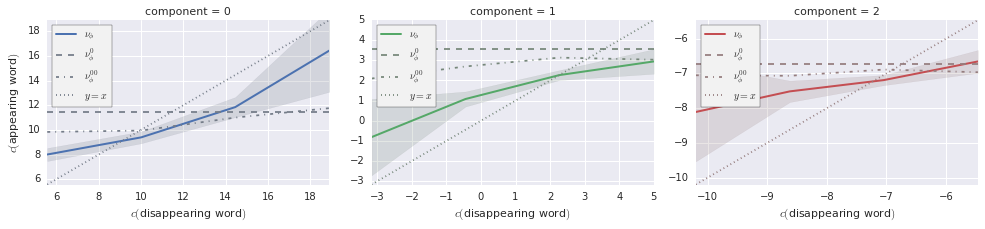

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.65354481  0.20826127]



,aoa,frequency,letters_count
Component-0,0.758444,-0.379467,0.529874
Component-1,-0.375015,0.410843,0.831007


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 2168) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  1% (  28 of 2168) |                       | Elapsed Time: 0:00:02 ETA: 0:06:00

  3% (  72 of 2168) |                       | Elapsed Time: 0:00:03 ETA: 0:01:33

  5% ( 109 of 2168) |#                      | Elapsed Time: 0:00:03 ETA: 0:01:11

  6% ( 148 of 2168) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:50

  8% ( 190 of 2168) |##                     | Elapsed Time: 0:00:03 ETA: 0:00:43

 10% ( 234 of 2168) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:12

 12% ( 272 of 2168) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:12

 14% ( 317 of 2168) |###                    | Elapsed Time: 0:00:04 ETA: 0:00:11

 16% ( 353 of 2168) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:11

 18% ( 396 of 2168) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:11

 20% ( 434 of 2168) |####                   | Elapsed Time: 0:00:05 ETA: 0:00:10

 21% ( 475 of 2168) |#####                  | Elapsed Time: 0:00:05 ETA: 0:00:10

 23% ( 515 of 2168) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:10

 25% ( 556 of 2168) |#####                  | Elapsed Time: 0:00:06 ETA: 0:00:10

 27% ( 597 of 2168) |######                 | Elapsed Time: 0:00:06 ETA: 0:00:10

 29% ( 642 of 2168) |######                 | Elapsed Time: 0:00:06 ETA: 0:00:09

 31% ( 678 of 2168) |#######                | Elapsed Time: 0:00:07 ETA: 0:00:09

 33% ( 721 of 2168) |#######                | Elapsed Time: 0:00:07 ETA: 0:00:09

 35% ( 759 of 2168) |########               | Elapsed Time: 0:00:07 ETA: 0:00:08

 36% ( 802 of 2168) |########               | Elapsed Time: 0:00:07 ETA: 0:00:08

 38% ( 841 of 2168) |########               | Elapsed Time: 0:00:08 ETA: 0:00:08

 40% ( 884 of 2168) |#########              | Elapsed Time: 0:00:08 ETA: 0:00:07

 42% ( 922 of 2168) |#########              | Elapsed Time: 0:00:08 ETA: 0:00:07

 44% ( 966 of 2168) |##########             | Elapsed Time: 0:00:08 ETA: 0:00:07

 46% (1003 of 2168) |##########             | Elapsed Time: 0:00:09 ETA: 0:00:07

 48% (1046 of 2168) |###########            | Elapsed Time: 0:00:09 ETA: 0:00:06

 50% (1085 of 2168) |###########            | Elapsed Time: 0:00:09 ETA: 0:00:06

 51% (1127 of 2168) |###########            | Elapsed Time: 0:00:09 ETA: 0:00:06

 53% (1166 of 2168) |############           | Elapsed Time: 0:00:10 ETA: 0:00:06

 55% (1209 of 2168) |############           | Elapsed Time: 0:00:10 ETA: 0:00:06

 57% (1247 of 2168) |#############          | Elapsed Time: 0:00:10 ETA: 0:00:05

 59% (1291 of 2168) |#############          | Elapsed Time: 0:00:10 ETA: 0:00:05

 61% (1328 of 2168) |##############         | Elapsed Time: 0:00:11 ETA: 0:00:05

 63% (1374 of 2168) |##############         | Elapsed Time: 0:00:11 ETA: 0:00:04

 65% (1410 of 2168) |##############         | Elapsed Time: 0:00:11 ETA: 0:00:04

 67% (1453 of 2168) |###############        | Elapsed Time: 0:00:11 ETA: 0:00:04

 68% (1491 of 2168) |###############        | Elapsed Time: 0:00:12 ETA: 0:00:04

 70% (1536 of 2168) |################       | Elapsed Time: 0:00:12 ETA: 0:00:03

 72% (1572 of 2168) |################       | Elapsed Time: 0:00:12 ETA: 0:00:03

 74% (1616 of 2168) |#################      | Elapsed Time: 0:00:12 ETA: 0:00:03

 76% (1654 of 2168) |#################      | Elapsed Time: 0:00:13 ETA: 0:00:03

 78% (1697 of 2168) |##################     | Elapsed Time: 0:00:13 ETA: 0:00:02

 80% (1735 of 2168) |##################     | Elapsed Time: 0:00:13 ETA: 0:00:02

 82% (1780 of 2168) |##################     | Elapsed Time: 0:00:13 ETA: 0:00:02

 83% (1816 of 2168) |###################    | Elapsed Time: 0:00:14 ETA: 0:00:02

 85% (1859 of 2168) |###################    | Elapsed Time: 0:00:14 ETA: 0:00:01

 87% (1898 of 2168) |####################   | Elapsed Time: 0:00:14 ETA: 0:00:01

 89% (1942 of 2168) |####################   | Elapsed Time: 0:00:14 ETA: 0:00:01

 91% (1979 of 2168) |####################   | Elapsed Time: 0:00:15 ETA: 0:00:01

 93% (2023 of 2168) |#####################  | Elapsed Time: 0:00:15 ETA: 0:00:00

 95% (2060 of 2168) |#####################  | Elapsed Time: 0:00:15 ETA: 0:00:00

 97% (2114 of 2168) |###################### | Elapsed Time: 0:00:15 ETA: 0:00:00

 99% (2159 of 2168) |###################### | Elapsed Time: 0:00:16 ETA: 0:00:00

100% (2168 of 2168) |######################| Elapsed Time: 0:00:16 Time: 0:00:16


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | ns. | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | *** | *** | *** |


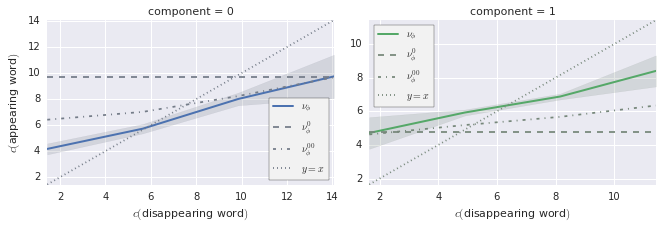

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 896 (cluster-unique) substitutions, but the PCA is in fact computed on 689 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
    * global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


   ** global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
   ** global -> global


    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
   ** global -> global


   ** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global


    * global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 507 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.14886845910616564

intercept                      3.865443
global_aoa                     0.087262
global_clustering              0.087832
global_frequency               0.496344
global_letters_count           0.041137
global_orthographic_density    0.123764
global_synonyms_count         -0.070474
dtype: float64

Regressing global frequency with 507 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.17534336034615694

intercept                                             -5.730113
global_aoa                                             0.378421
global_clustering                                     -0.687814
global_frequency                                       1.062962
global_letters_count                                   0.525178
global_orthographic_density                            3.646511
global_syno

Regressing rel frequency with 507 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.350031073981955

intercept                                       -1.351717
rel_aoa                                          0.097186
rel_clustering                                   0.065455
rel_frequency                                    0.610241
rel_letters_count                                0.040910
rel_orthographic_density                        -0.490311
rel_synonyms_count                              -0.104349
rel_aoa * rel_clustering                        -0.060808
rel_aoa * rel_frequency                         -0.031812
rel_aoa * rel_letters_count                     -0.003590
rel_aoa * rel_orthographic_density               0.051232
rel_aoa * rel_synonyms_count                     0.079390
rel_clustering * rel_frequency                  -0.027029
rel_clustering * rel_letters_count               0.057011
rel_clustering * rel_orthographic_density        0.136978
rel_clustering * r

Regressing rel aoa with 470 measures, no interactions
           ^^^^^^^
R^2 = 0.08046811241597673

intercept                      0.096487
global_aoa                     0.228699
global_clustering             -0.024656
global_frequency              -0.162187
global_letters_count           0.038993
global_orthographic_density    0.128308
global_synonyms_count          0.060349
dtype: float64

Regressing rel aoa with 470 measures, with interactions
           ^^^^^^^
R^2 = 0.1317044831280274

intercept                                              2.783645
global_aoa                                             1.325265
global_clustering                                      0.271603
global_frequency                                      -0.696587
global_letters_count                                  -0.482013
global_orthographic_density                           -2.000187
global_synonyms_count                                 -2.391719
global_aoa * global_clustering                         

Regressing global aoa with 470 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.42720786078292017

intercept                                                 87.009056
global_aoa                                                -0.624043
global_clustering                                         10.657230
global_frequency                                          -1.349423
global_letters_count                                      -6.913005
global_orthographic_density                              -18.815137
global_synonyms_count                                    -30.324953
rel_aoa                                                   -2.033737
rel_clustering                                            -1.715798
rel_frequency                                              3.376187
rel_letters_count                                          4.774869
rel_orthographic_density                                  13.087706
rel_synonyms_count                                        13.275195
global_a

Regressing global clustering with 430 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.08355053373310771

intercept                  -5.857019
rel_aoa                     0.007949
rel_clustering              0.309629
rel_frequency               0.012782
rel_letters_count          -0.021625
rel_orthographic_density   -0.037722
rel_synonyms_count         -0.118279
dtype: float64

Regressing global clustering with 430 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.1534952955617822

intercept                                       -5.756006
rel_aoa                                         -0.050427
rel_clustering                                   0.064191
rel_frequency                                    0.067615
rel_letters_count                               -0.069930
rel_orthographic_density                        -0.031491
rel_synonyms_count                              -0.147130
rel_aoa * rel_clustering                         0.078249
rel_aoa * rel_freque

Regressing rel clustering with 430 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.4531538462732221

intercept                                                 13.555865
global_aoa                                                 0.365467
global_clustering                                          0.897010
global_frequency                                          -2.121001
global_letters_count                                      -0.737472
global_orthographic_density                                0.376531
global_synonyms_count                                     -1.586738
rel_aoa                                                   -0.959394
rel_clustering                                            -0.881024
rel_frequency                                              0.575680
rel_letters_count                                         -0.005739
rel_orthographic_density                                  -1.480007
rel_synonyms_count                                        -1.543459
g

Regressing rel letters_count with 507 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.21368942103571742

intercept                   0.860313
rel_aoa                    -0.131576
rel_clustering              0.077136
rel_frequency              -0.167865
rel_letters_count           0.452525
rel_orthographic_density   -0.075312
rel_synonyms_count         -0.227157
dtype: float64

Regressing rel letters_count with 507 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2524729609432135

intercept                                        0.913973
rel_aoa                                         -0.170146
rel_clustering                                   0.358839
rel_frequency                                   -0.067962
rel_letters_count                                0.555657
rel_orthographic_density                        -0.069058
rel_synonyms_count                               0.035819
rel_aoa * rel_clustering                         0.160944
rel_aoa * rel_freque

intercept                      1.066926
global_aoa                    -0.019574
global_clustering              0.024069
global_frequency              -0.023793
global_letters_count          -0.042994
global_orthographic_density   -0.030655
global_synonyms_count          0.268824
dtype: float64

Regressing global synonyms_count with 496 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.14294037430001194

intercept                                              4.267623
global_aoa                                            -0.247835
global_clustering                                      0.298177
global_frequency                                      -0.243656
global_letters_count                                  -0.161809
global_orthographic_density                           -0.457742
global_synonyms_count                                 -0.093912
global_aoa * global_clustering                        -0.005914
global_aoa * global_frequency                          0.00327

Regressing rel synonyms_count with 496 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.22573394773571254

intercept                                        0.157904
rel_aoa                                         -0.000373
rel_clustering                                  -0.120357
rel_frequency                                    0.012219
rel_letters_count                               -0.084100
rel_orthographic_density                        -0.040024
rel_synonyms_count                               0.543520
rel_aoa * rel_clustering                         0.002390
rel_aoa * rel_frequency                          0.006105
rel_aoa * rel_letters_count                      0.027508
rel_aoa * rel_orthographic_density               0.046229
rel_aoa * rel_synonyms_count                     0.030480
rel_clustering * rel_frequency                  -0.030667
rel_clustering * rel_letters_count               0.009752
rel_clustering * rel_orthographic_density       -0.001190
rel_cl

Regressing rel orthographic_density with 433 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.16084023904619493

intercept                     -1.641487
global_aoa                    -0.013052
global_clustering             -0.037538
global_frequency               0.022749
global_letters_count          -0.013293
global_orthographic_density    0.312372
global_synonyms_count          0.126064
dtype: float64

Regressing rel orthographic_density with 433 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.2073093626022967

intercept                                             -0.589592
global_aoa                                            -0.204654
global_clustering                                      0.405156
global_frequency                                       0.286348
global_letters_count                                  -0.139759
global_orthographic_density                            0.256530
global_synonyms_count                              

Regressing global orthographic_density with 433 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.34601970694630246

intercept                                                 3.135476
global_aoa                                               -0.646649
global_clustering                                         0.125532
global_frequency                                          0.231341
global_letters_count                                     -0.409319
global_orthographic_density                               0.416533
global_synonyms_count                                     6.299264
rel_aoa                                                   0.164909
rel_clustering                                           -0.360952
rel_frequency                                            -0.140169
rel_letters_count                                         0.127116
rel_orthographic_density                                 -0.763003
rel_synonyms_count                                    